# Cyfrowe Przetwarzanie Sygnałów

**Laboratorium nr 3 Analiza częstotliwościowa - podstawy**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat 

Python/colab: Artur Strózik

##**1. DFT sygnału harmonicznego (1 pkt)**
Wyznacz macierz A transformacji DFT: 
  
$A(k,n)=\frac{1}{\sqrt{N}}\mathrm{W_{N}}^{-kn}$, gdzie $W_{N}=\mathrm{e}^{j\frac{2\pi}{N}},$ $k,n=0,...,N−1$ to wiersze i kolumny macierzy $A$

dla *N=100* i oblicz DFT $(X=Ax)$ następującego sygnału $x$:

$x(t)=A_1\cos(2\pi f_1 t + \phi_1) + A_2\cos(2\pi f_2 t + \phi_2)$

spróbkowanego z częstotliwością *fs=1000* Hz, mającego *N=100* próbek i będącego sumą dwóch kosinusoid,  o częstotliwościach *f1=100* Hz i *f2=200* Hz, amplitudach *A1=100* i *A2=200* oraz kątach fazowych $φ_{1}=\frac{\pi}{7}$ i $φ_{2}=\frac{\pi}{11}$.

Narysuj widmo $x$ (część rzeczywista, urojona, moduł, faza), wyskaluj oś częstotliwości w hercach. Zauważ, że część rzeczywista współczynnika widmowego mówi ile w sygnale jest kosinusa o danej częstotliwości, a część urojona – ile sinusa (do składowych sygnału zastosuj wzór na kosinusa sumy kątów: *cos(a+b)=cos(a)cos(b)-sin(a)sin(b)*). Zauważ, że część rzeczywista jest symetryczna (to samo) względem częstotliwości *fs/2* (próbka *N/2+1*), a część urojona – asymetryczna (wartość zanegowana).

Wyznacz macierz rekonstrukcji $B$ jako wynik sprzężenia zespolonego i transpozycji macierzy $A$ (`B=A'`). Zrekonstruuj sygnał na podstawie $X (x_{r}=BX)$ i porównaj go z oryginałem $x (x_{r}==x \ ?)$. Zastąp operację `X=Ax` poprzez `X=fft(x)`, zaś `xr=BX` – przez `xr=ifft(X)`. Czy $x$ i $x_{r}$ są takie same jak poprzednio? O ile wartości nowego $X$ są różne od poprzednich i czy jest to związane z wartością *N*? Zmień *f1=100* Hz na *f1=125* Hz, oblicz i wyświetl widmo jak poprzednio. 




---
> $^{1}$ Konwencja zapisu transformaty Fouriera jest taka, że jej wynik (wektor $X$) jest zapisywany dużą literą, natomiast wektor wejściowy $x$ jest pisany małą literą. Jest to trochę mylące, poniważ $X$ sugeruje macierz, a w tym kontekście jest wektorem o rozmiarze takim samym jak $x$.



## **2. DtFT (1 pkt)**

Ustaw *f1=125* Hz i przyjmij $X_{1}=X$ (z poprzedniego ćwiczenia). Następnie zwiększ rozdzielczość częstotliwości poprzez dołączenie *M=100* zer na końcu sygnału $x$ (otrzymujemy sygnał $x_{z}$) oraz wykonaj skalowanie `X2=fft(xz)./(N+M)` (otrzymujemy $X_{2}$), które jest obliczane według wzoru:

$$
X_{2}(k)=\frac{1}{N+M} \sum_{n=0}^{N+M-1} x_{z}(n) e^{-j\frac{2\pi}{N}kn}
$$

gdzie *k=0,1,...,N+M*. Zwróć uwagę, że sygnał $x_{z}$ ma teraz długość *N+M* próbek i jest rozszerzony *M* zerami. 

Następnie oblicz *X3* stosując wzór na DtFT(x):

$$
X_{3}(f)=\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{-j 2\pi \frac{f}{f_{s}}n}
$$

stosując wartości *f=0:0.25:1000* Hz. Wyznacz trzy widma:
* $X_{1}$  czyli DFT o długości *N*, sygnału próbkowanego częstotliwością *fs* gdzie wektor częstotliwości można wyliczyć jako: `fx1=fs*(0:N-1)/N`
* $X_{2}$ (DFT z dodaniem zer), wyznacz odpowiedni wektor `fx2`
* $X_{3}$ (DtFT), wyznacz odpowiedni wektor `fx3`.

Narysuj wartości bezwzględne tych widm na jednym rysunku za pomocą instrukcji: `plot(fx1,X1,'o',fx2,X2,'bx',fx3,X3,'k-')`. Następnie oblicz $X_{3}$ dla *f=-2000:0.25:2000* Hz *(-2fs:df:2fs)* i ponownie narysuj trzy widma $X_{1}$, $X_{2}$, $X_{3}$ na jednym rysunku. Jak widać obliczone widma $X_{1}$ i $X_{2}$ są (a)symetryczne, a widmo $X_{3}$ jest okresowe. Dlatego wystarczy rysować widma tylko dla *f=0:df:fs/2*.




## **3. DtFT, rola funkcji okien i liczby próbek (1 pkt)**

Dla sygnału z ćwiczenia 1 ustaw `f=0:0.1:500` (dla DtFT), *N=100*,  *f1=100* Hz i *f2=125* Hz, *A1=1* i *A2=0.0001*. Oblicz DtFT i wyświetl widmo. Czy widzisz obie składowe sygnału? Następnie wymnóż próbki sygnału kolejno z oknem prostokątnym, Hamminga, Blackmana, Czebyszewa (tłumienie 100 dB) i Czebyszewa (tłumienie 120 dB), oblicz DtFT i wyświetl moduły pięciu widm na jednym rysunku. Następnie ustaw w ostatnim zadaniu *N=1000* i powtórz go ale tylko dla różnych wartości tłumienia okna Czebyszewa.

## **4. Analiza częstotliwościowa sygnału ADSL (2 pkt)**

Wykonaj analizę częstotliwościową dostarczonego sygnału ADSL. Sygnał zawiera *K=8* ramek o długości *N=512* próbek z prefiksem *M=32* położonych jak na rysunku 4.1.

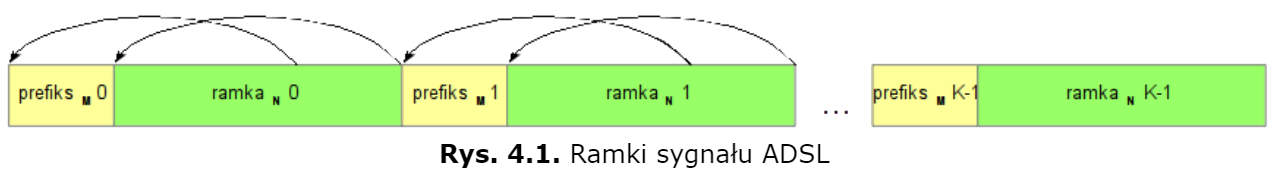

Każda ramka *N* próbek ma zaalokowanych kilkanaście różnych podkanałów częstotliwościowych czyli dane znajdują się na odpowiednich ,,harmonicznych''. Ramki sygnału rozpoczynają się od początku sygnału, tak więc *m*-ty prefiks rozpoczyna się w próbce *m**(N+M)+1.

Zadania:  
* wykonać *N*-punktowe DFT (FFT) każdej ramki (po usunięciu prefiksu)
* wyznaczyć, które harmoniczne były w niej używane.

Sygnał do analizy znajduje się w pliku `lab_03.mat`. Użyj sygnału ze wektora o nazwie `x_??` gdzie `??` jest liczbą otrzymaną jako rezultat wykonania: `mod(twoj_numer_indeksu, 16)+1`.

In [ ]:
import scipy.io
import gdown

# Pobranie danych
gdown.download("https://drive.google.com/uc?id=1WIq94-IBt3Z1W5_y537PzpuzFrB3Fya2", "lab_03.mat", quiet=False)

# Odczytanie pliku lab_03.mat
mat = scipy.io.loadmat('lab_03.mat')
x = mat['x_2']


## **5. Analiza rzeczywistego sygnału DAB (opcjonalnie, +1 pkt)**

W rzeczywistym sygnale DAB w przerwie zerowej (*Null Symbol*) może być przesyłana dodatkowa informacja. Jest to suma prostych sygnałów sinusoidalnych. W laboratorium 01 napisałeś program do detekcji próbek, należących do sygnału *Null Symbol*. Teraz dodaj do niego wywoływanie funkcji `fft(...)` na próbkach „zerowych”, wyskaluj otrzymane widma częstotliwościowe i je wyświetl.  Częstotliwość próbkowania *fs=2.048* MHz.

Wykorzystując spostrzeżenia z zadania 5 z Lab02, wyznacz jakie według ciebie sekwencje bitów były przesyłane w sygnałach DAB, analizowanych w zadaniu 4 Lab1. Narysuj na jednym rysunku „konstelację obrotów” wykonywanych na jednej częstotliwości nośnej, czyli wszystkie obroty, które wykonano na wybranej częstotliwości w jednej ramce DAB (rysunek: `Imag()` w funkcji `Real()` kolejnych zespolonych liczb obracających, dla 76 bloków danych; bez linii łączących kolejne wartości kątów obrotu „o” oraz z tymi liniami). Narysuj na jednym rysunku zmienność wartości kąta obrotu dla wszystkich częstotliwości (w poziomie – numer obrotu, w pionie – jego wartość w stopniach; zaznacz wartości kąta symbolem „o”, nie łącz początkowo tych symboli liniami, potem je połącz – otrzymasz wiele linii na jednym rysunku, każda dla innej częstotliwości - czyli tzw. wykres oczkowy)

In [ ]:
import gdown

gdown.download("https://drive.google.com/uc?id=1O3JDZAxL0fLdgI_Gw6Hi4Oa1aetR3MTS", "DAB_real_2.048MHz_IQ_float.dat", quiet=False)
